In [3]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10)
import warnings
warnings.filterwarnings('ignore')
df_main = pd.read_csv('Datasets/UTD_Data_1-001.csv')

In [11]:
df_main.head(5)

Column Field,Monitor_date,Veh_Value,ApplicantFICOScore,DTI,LTV,PTI_BOOKED,SalesTax,AMOUNT_FINANCED,Appl_Debt,Appl_Income,PTI_Approved,CUSTOM_SCORE,DTI_RATIO,MOB,DOWN_CASH,FINANCED_AMOUNT,BACKEND_TOTAL,LINE4_LTV,ContactCount,F0066_CONTACT_NO_PROMISE_COUNT,DSL_NSF,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,F0068_ATTEMPTED_CONTACT_COUNT,F0071_CORRESPONDENCE_COUNT,F0089_PROMISE_AMT_1,F0283_PROMISES_KEPT_LIFE_TO_DATE,F0304_TODAY_MINUS_PROMISES_TAKEN_DATE,F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE,F0306_TODAY_MINUS_LEFT_MESSAGES_DATE,F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE,F0314_TODAY_MINUS_DAYS_LAST_CONTACT,F0317_DAYS_SINCE_LAST_LETTER,F0320_TODAY_MINUS_DAYS_LAST_MONETARY,F0381_DAYS_DELINQUENT_360,F0385_LAST_NSF_DATE,PROMISE_STATUS_O,BALANCE_PERCENT_LOAN,F0146_PAST_DUE_PAYMENTS,DSLP,DSL_ext,DAY_OF_MONTH_DUE_DATE,EXTENSION_ELIGIBLE_Y,F0145_BALANCE,F0180_CURRENT_INTEREST_RATE,F0198_NUMBER_OF_PAYMENTS_PAID,F0217_NSF_HISTORY,F0223_NUMBER_OF_EXTENSIONS,PMT_RAT_OBS,lastchannel_Z,LatefeeAmtLast120Days,PaymentAmtLast120Days,PaymentAmtLast30Days,PaymentAmtLast60Days,PaymentAmtLast90Days,PaymentNumLast120Days,PmtNumFullAmtLast60Days,LIFETIME_COUNT_Paymentus_Debit,D31P_TOT_2,D9P_TOT_2,D9P_TOT_3,D9P_TOT_4,D9P_TOT_6,D5P_TOT_4,D5P_TOT_1,D31P_TOT_6,DD_AVG_1,BAL_RAT_TRN_3,BAL_RAT_TRN_6,PMT_RAT_AVG_1,PMT_RAT_AVG_2,PMT_RAT_AVG_3,PMT_RAT_AVG_4,BAL_TRN_3,BAL_TRN_6,CBTINDIRECTGEN23,CBTINDIRECTGEN30,REM_TM_RAT_OBS,LOANFUNDINGSCORE,VRS,LTVEffective,DepreciationRate,INQ12_5,masked_account,booked_yr_mo
0,2019-04-26,20379,0,0.2479,0.8416,0.0870,1258.40,17151.9004,1074.23,4333.33,0.0864,507,0.2479,71,1000.0,17151.90,0.0,-2499.1584,4.0,4.0,NaN,1.0,11.0,174.0,151.0,396.78,6.0,1.0,89.0,918.0,1.0,1.0,457.0,1.0,-17.0,NaN,0,0.0344,0.00,1.0,NaN,14.0,1,590.40,0.1625,71.0,0.000000e+00,0.0,2.1061,1,0.0,1567.12,793.56,1190.34,1190.34,4,3,0,0.0,12.0,16.0,19.0,23.0,35.0,8.0,0.0,-2.0,0.07,0.08,105.0,105.0,103.0,103.0,-11.96,-13.48,542.0,NaN,0,527.0,66.0,4373.333333,0.381582,NaN,0x44575E78B9056F6DE3B84F399F41DFFAB116C29C8000...,201305
1,2019-04-26,15950,639,0.4006,1.1345,0.1904,1288.52,18095.0000,863.69,2156.00,0.1599,574,0.4006,71,1000.0,18095.00,2795.0,0.9592,2.0,30.0,NaN,208.0,17.0,836.0,42.0,410.55,0.0,213.0,9.0,253.0,1.0,9.0,213.0,51.0,34.0,NaN,0,0.2663,785.48,51.0,212.0,23.0,0,4819.59,0.1750,63.0,0.000000e+00,6.0,0.0000,1,0.0,1340.00,0.00,440.00,440.00,5,0,0,5.0,31.0,31.0,31.0,65.0,42.0,30.0,8.0,20.0,0.02,0.04,24.0,35.0,56.0,68.0,-3.23,-7.63,485.0,NaN,0,468.0,79.0,35700.666667,0.423980,NaN,0x192B7529EA22734C5C17866207A1DA9473BD54B10115...,201305
2,2019-04-26,20950,639,0.2579,1.0159,0.0759,1446.25,21282.2500,1518.00,5886.00,0.0675,555,0.2579,71,2000.0,21282.25,2145.0,0.9134,NaN,16.0,555.0,NaN,26.0,1372.0,90.0,0.00,0.0,542.0,878.0,772.0,542.0,586.0,437.0,22.0,-97.0,2017-10-18 00:00:00.000,0,0.2589,0.00,22.0,585.0,4.0,1,5512.04,0.1450,72.0,0.000000e+00,2.0,1.2630,1,0.0,1583.59,372.61,838.37,1210.98,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-105.0,0.05,0.05,135.0,143.0,138.0,137.0,-11.06,-10.78,573.0,NaN,0,573.0,47.0,35561.548387,0.369178,NaN,0xABD1739111128491CD14209186264C80091FFE3A0F83...,201305
3,2019-04-26,11975,542,0.3509,0.9041,0.1070,755.94,10826.4297,842.16,2400.00,0.0972,517,0.3509,71,2700.0,10826.43,0.0,0.9040,14.0,42.0,750.0,-3.0,56.0,401.0,118.0,300.00,4.0,9.0,54.0,22.0,9.0,9.0,247.0,9.0,9.0,2017-04-06 00:00:00.000,1,0.0573,621.42,9.0,150.0,18.0,0,621.42,0.1725,65.0,0.000000e+00,4.0,2.2466,1,0.0,1089.16,577.16,1089.16,1089.16,2,2,0,29.0,52.0,81.0,111.0,156.0,116.0,26.0,85.0,35.0,0.10,0.07,207.0,203.0,170.0,152.0,-11.13,-8.00,508.0,NaN,1,532.0,74.0,4603.111111,0.423980,NaN,0xC8E3BB4A1F304CD809CF3DE12776777767083E978332...,201305
4,2019-04-26,14175,543,0.2477,1.2278,0.1076,1517.40,17404.4004,1090.04,4400.64,0.0825,449,0.2477,25,1500.0,17404.40,2000.0,1.0867,1.0,17.0,7.0,99.0,11.0,495.0,33.0,2668.00,2.0,99.0,15.0,22.0,100.0,15.0,226.0,12.0,-5.0,2019-04-19 00:00:00.000,0,0.2162,0.00,12.0,317.0,2.0,1,3763.60,0.2500,22.0,1.000000e+11,2.0,26.7826,1,0.0,

In [4]:
headers = pd.read_excel("Datasets/Data dictionary for UTD dataset.xlsx",sheet_name  = 'Main Data')

In [5]:
temp = df_main.columns

In [6]:
df_main.columns = headers['Column Field']

In [7]:
df_main.rename(columns = { 'PullDate' : 'Monitor_date'}, inplace = True)

In [8]:
df_origin = pd.read_csv('Datasets/UTD_Orig_Data.csv',delimiter='\t')

In [9]:
df_origin.rename(columns = { 'Masked_account ' : 'masked_account'}, inplace = True)

In [106]:
Deliquency_log = pd.read_csv('Final_account_log.csv')
Deliquency_log = Deliquency_log.fillna('NA')

In [108]:
df_model = pd.merge(Deliquency_log,df_main, how = 'left', on = ['masked_account','Monitor_date'])

In [130]:
df_model = pd.merge(df_model,df_origin, how = 'left', on = 'masked_account')

# Replacing Missing Values by 0

In [134]:
df_model.DSL_NSF = df_model.DSL_NSF.fillna(0)
df_model.CBTINDIRECTGEN30 = df_model.CBTINDIRECTGEN30.fillna(0)

In [146]:
df_model = temp

In [ ]:
df_model.drop(['Monitor_date','Veh_Value','Appl_Income',
              'SalesTax','AMOUNT_FINANCED','Appl_Debt',
              'PTI_Approved','DTI_RATIO','DOWN_CASH','FINANCED_AMOUNT','F0089_PROMISE_AMT_1',
              'F0385_LAST_NSF_DATE','F0146_PAST_DUE_PAYMENTS','DAY_OF_MONTH_DUE_DATE',
              'F0145_BALANCE','LatefeeAmtLast120Days','REM_TM_RAT_OBS'],axis =1,inplace = True)

In [154]:
df_model.drop(['Ammount_outstanding','Parital_30',
               'Paid_back','Partial',
               'partial_paydate','Paybackdate'],axis = 1, inplace = True)

In [160]:
df_model = df_model[df_model.Paid_In_30 != 'Payment_Record_Missing']

In [301]:
df_model.to_csv('model_data.csv')

In [560]:
df_model_1 = pd.read_csv('model_data.csv')

In [610]:
df_model_1.Paid_In_30.value_counts()

Yes    26258
No     20906
Name: Paid_In_30, dtype: int64

In [563]:
df_model_1.reset_index(inplace = True)
df_model_1.drop(['index'],axis = 1,inplace = True)

# Removing columns with more than 30% of missing data

In [564]:
t = df_model_1.isna().sum()/df_model_1.shape[0]*100 
df_model_1.drop(list(t[t > 30].index),axis =1,inplace = True)

In [565]:
df_model_1.drop(['F0317_DAYS_SINCE_LAST_LETTER',
                 'F0305_TODAY_MINUS_CONTACT_NO_PROMISE_DATE'],axis =1,
               inplace = True)

In [566]:
df_model_1['Flag'] = df_model_1.isna().CBTINDIRECTGEN23

In [567]:
def score(flag,x,y):
    if flag == True:
        return(y)
    else:
        return(x)
df_model_1.CBTINDIRECTGEN23 = df_model_1.apply(lambda x: score(x.Flag,x.CBTINDIRECTGEN23,x.CBTINDIRECTGEN30),axis = 1)

In [568]:
df_model_1.drop(['Flag','CBTINDIRECTGEN30'],axis = 1,inplace =True)

In [569]:
final = df_model_1

In [570]:
final.shape

(47164, 68)

In [571]:
final.drop(['Applicant_state','booked_yr_mo'],axis = 1,inplace = True)

## Highly Co-relataed Data

<AxesSubplot:>

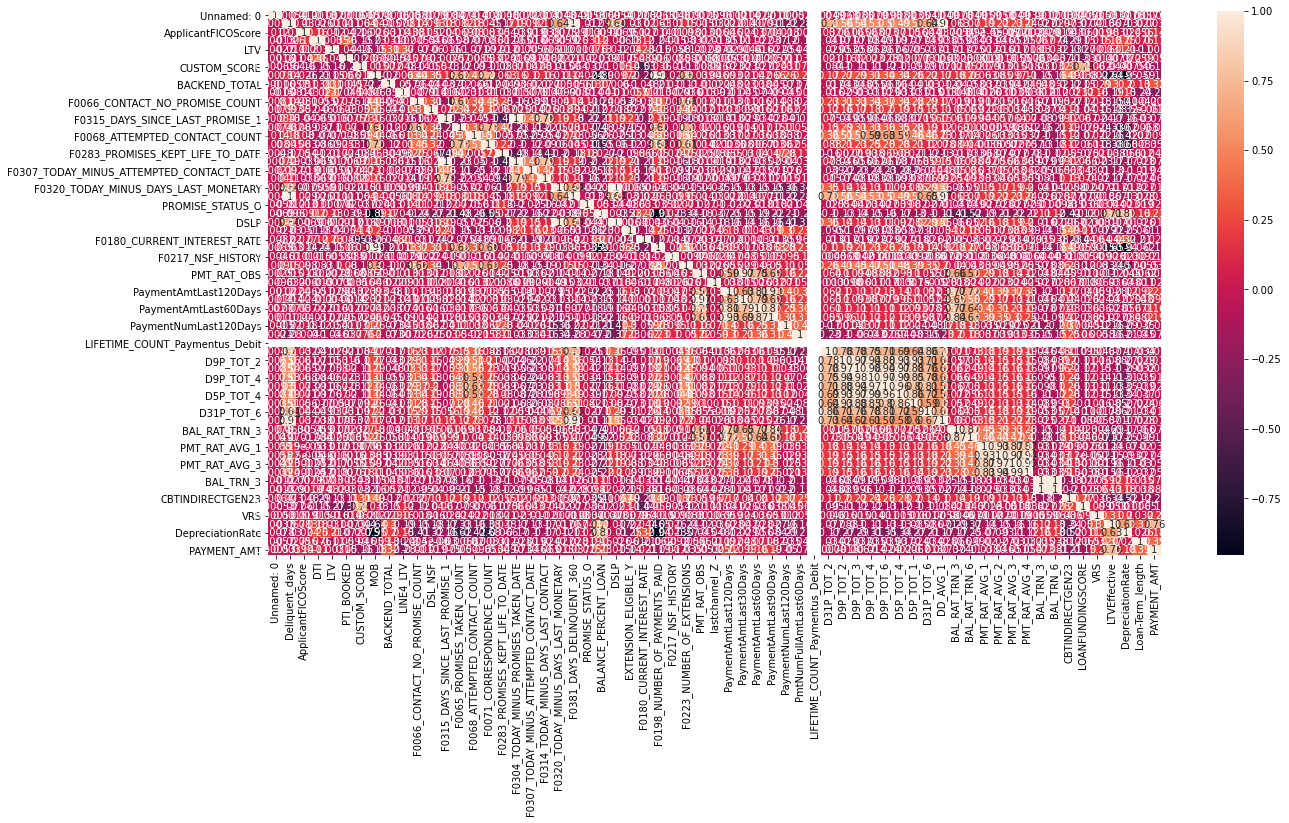

In [368]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Checking dependencies in parameters
plt.figure(figsize=(20,10))
sns.heatmap(final.corr(),annot =True,fmt = '.2g')

In [369]:
correlated_columns= []
for column in final.corr().columns:
    highly_correlated = final.corr().columns[(final.corr()>0.9)[column].values]

    for col in highly_correlated:
        correlated_columns.append((col,column))
highly_correlated = []
for (x,y) in correlated_columns:
    if x != y:
        highly_correlated.append((x,y))

In [370]:
highly_correlated = []
for (x,y) in correlated_columns:
    if x != y:
        if ((x,y) not in highly_correlated) & ((y,x) not in highly_correlated):
            highly_correlated.append((x,y))

In [371]:
highly_correlated

[('F0381_DAYS_DELINQUENT_360', 'Deliquent_days'),
 ('DD_AVG_1', 'Deliquent_days'),
 ('F0198_NUMBER_OF_PAYMENTS_PAID', 'MOB'),
 ('F0304_TODAY_MINUS_PROMISES_TAKEN_DATE', 'F0315_DAYS_SINCE_LAST_PROMISE_1'),
 ('DSLP', 'F0320_TODAY_MINUS_DAYS_LAST_MONETARY'),
 ('DD_AVG_1', 'F0381_DAYS_DELINQUENT_360'),
 ('PaymentAmtLast30Days', 'PMT_RAT_OBS'),
 ('PaymentAmtLast90Days', 'PaymentAmtLast120Days'),
 ('D9P_TOT_3', 'D9P_TOT_2'),
 ('D9P_TOT_4', 'D9P_TOT_2'),
 ('D5P_TOT_4', 'D9P_TOT_2'),
 ('D5P_TOT_1', 'D9P_TOT_2'),
 ('D9P_TOT_4', 'D9P_TOT_3'),
 ('D9P_TOT_6', 'D9P_TOT_3'),
 ('D5P_TOT_4', 'D9P_TOT_3'),
 ('D9P_TOT_6', 'D9P_TOT_4'),
 ('D5P_TOT_4', 'D9P_TOT_4'),
 ('D5P_TOT_4', 'D9P_TOT_6'),
 ('PMT_RAT_AVG_2', 'PMT_RAT_AVG_1'),
 ('PMT_RAT_AVG_3', 'PMT_RAT_AVG_2'),
 ('PMT_RAT_AVG_4', 'PMT_RAT_AVG_2'),
 ('PMT_RAT_AVG_4', 'PMT_RAT_AVG_3'),
 ('BAL_TRN_6', 'BAL_TRN_3')]

### We can see that  'Deliquent_days', 'F0381_DAYS_DELINQUENT_360' are  essentially showing same information

### 'F0304_TODAY_MINUS_PROMISES_TAKEN_DATE', 'F0315_DAYS_SINCE_LAST_PROMISE_1' also have same piece of information

### 'DSLP', 'F0320_TODAY_MINUS_DAYS_LAST_MONETARY' 

### 'PaymentAmtLast30Days', 'PMT_RAT_OBS'

### 'PaymentAmtLast90Days', 'PaymentAmtLast120Days'

### 'D9P_TOT_3', 'D9P_TOT_2'

### 'PMT_RAT_AVG_2', 'PMT_RAT_AVG_1'

In [572]:
final.drop(['Deliquent_days','F0315_DAYS_SINCE_LAST_PROMISE_1','F0320_TODAY_MINUS_DAYS_LAST_MONETARY','PaymentAmtLast30Days',
           'PaymentAmtLast120Days','D9P_TOT_2','PMT_RAT_AVG_1'],axis = 1,inplace = True)

In [575]:
df_model_1.isna().sum()

Unnamed: 0                                    0
masked_account                                0
Paid_In_30                                    0
ApplicantFICOScore                           47
DTI                                          47
LTV                                          47
PTI_BOOKED                                   47
CUSTOM_SCORE                                 47
MOB                                          47
BACKEND_TOTAL                                47
LINE4_LTV                                    47
F0066_CONTACT_NO_PROMISE_COUNT                0
DSL_NSF                                       0
F0065_PROMISES_TAKEN_COUNT                    0
F0068_ATTEMPTED_CONTACT_COUNT                 0
F0071_CORRESPONDENCE_COUNT                    0
F0283_PROMISES_KEPT_LIFE_TO_DATE              0
F0304_TODAY_MINUS_PROMISES_TAKEN_DATE         0
F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE      0
F0314_TODAY_MINUS_DAYS_LAST_CONTACT           0
F0381_DAYS_DELINQUENT_360               

In [574]:
df_model_1.F0066_CONTACT_NO_PROMISE_COUNT = df_model_1.F0066_CONTACT_NO_PROMISE_COUNT.fillna(0)
df_model_1.F0068_ATTEMPTED_CONTACT_COUNT = df_model_1.F0068_ATTEMPTED_CONTACT_COUNT.fillna(0)
df_model_1.F0071_CORRESPONDENCE_COUNT = df_model_1.F0068_ATTEMPTED_CONTACT_COUNT.fillna(0)
df_model_1.F0283_PROMISES_KEPT_LIFE_TO_DATE = df_model_1.F0283_PROMISES_KEPT_LIFE_TO_DATE.fillna(0)
df_model_1.F0065_PROMISES_TAKEN_COUNT = df_model_1.F0065_PROMISES_TAKEN_COUNT.fillna(0)


df_model_1.F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE = df_model_1.F0307_TODAY_MINUS_ATTEMPTED_CONTACT_DATE.fillna(-1)
df_model_1.F0304_TODAY_MINUS_PROMISES_TAKEN_DATE = df_model_1.F0304_TODAY_MINUS_PROMISES_TAKEN_DATE.fillna(-1)
df_model_1.F0314_TODAY_MINUS_DAYS_LAST_CONTACT = df_model_1.F0314_TODAY_MINUS_DAYS_LAST_CONTACT.fillna(-1)
df_model_1.DSLP = df_model_1.DSLP.fillna(-1)

# We will drop Rows or accounts with NA values.

In [576]:
final = df_model_1.dropna()

## Final Data Used for Modelling

In [551]:
final.to_csv('final_cleaned_data_1.csv')

# XGB model

In [593]:
final = pd.read_csv('final_cleaned_data_1.csv')

In [594]:
final  = final.iloc[:,2:]

In [595]:
X = final.drop(['masked_account','Paid_In_30',],axis = 1)
Y = final['Paid_In_30']

In [596]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
X.Credit_tier = enc.fit_transform(X.Credit_tier)

enc_labels = LabelEncoder()
Y = enc_labels.fit_transform(Y)

In [597]:
enc.classes_

array(['A', 'A+', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'F'],
      dtype=object)

In [598]:
enc_labels.classes_

array(['No', 'Yes'], dtype=object)

In [599]:
from sklearn.model_selection import train_test_split

# Splitting Data into Training and Testing Data
x_train_tree,x_test,y_train_tree,y_test = train_test_split(X,Y,random_state =7,test_size=0.2)

In [600]:
# Intializing the XGB model
import xgboost as xgb
from sklearn import metrics
XGmodel = xgb.XGBClassifier(learning_rate =0.05,n_estimators=1000,min_child_weight=1,max_depth=4,
                        gamma=0,objective= 'binary:logistic')
# Creating training matrix
xgtrain = xgb.DMatrix(x_train_tree.values, label=y_train_tree)

# Checking the score on the model
XGmodel.fit(x_train_tree,y_train_tree)
y_predicted = XGmodel.predict_proba(x_test)
print("Score of the intialized model " + str(XGmodel.score(x_test,y_test)))
print("AUC : " + str(metrics.roc_auc_score(y_test,y_predicted[:,1])))

[17:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score of the intialized model 0.8420101997450063
AUC : 0.9163432438211401


## Data Cross-Validation

In [601]:
# Tune 1 (Tuning the max_depth and min_child_weight) 
params = [
    {
    'max_depth' : np.arange(9,15,1),
    'min_child_weight' : np.arange(0.8,1,0.1)
    }
]

clf = GridSearchCV(XGmodel,params,n_jobs=-1,cv = 3 , scoring='roc_auc')
best = clf.fit(x_train_tree,y_train_tree)
best.best_params_

[18:58:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'max_depth': 12, 'min_child_weight': 0.8}

In [602]:
# Training the first tuned model
XGmodel_tune_1 = best.best_estimator_
XGmodel_tune_1.fit(x_train_tree,y_train_tree,eval_metric = 'auc')

y_predicted = XGmodel_tune_1.predict_proba(x_test)
print("Score of the first tuned model " + str(XGmodel_tune_1.score(x_test,y_test)))
print("AUC : " + str(metrics.roc_auc_score(y_test,y_predicted[:,1])))

Score of the first tuned model 0.8460475988100298
AUC : 0.9171634649475323


In [535]:
# # Tune 1 (Tuning the max_depth and min_child_weight) 
# params = [
#     {
#     'gamma' : np.arange(0,0.5,0.1),
#     'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
#     }
# ]

# clf = GridSearchCV(XGmodel_tune_1,params,n_jobs=-1,cv = 3 , scoring='roc_auc')
# best = clf.fit(x_train_tree,y_train_tree)
# best.best_params_

In [536]:
# # Training the Second tuned model
# XGmodel_tune_2 = best.best_estimator_
# XGmodel_tune_2.fit(x_train_tree,y_train_tree,eval_metric = 'auc')

# y_predicted = XGmodel_tune_2.predict_proba(x_test)
# print("Score of the second tuned model " + str(XGmodel_tune_2.score(x_test,y_test)))
# print("AUC : " + str(metrics.roc_auc_score(y_test,y_predicted[:,1])))


In [604]:
XGmodel = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=12,
              min_child_weight=0.9, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Checking the score on the model
XGmodel.fit(x_train_tree,y_train_tree)
y_predicted = XGmodel.predict_proba(x_test)

print("Score of the intialized model " + str(XGmodel.score(x_test,y_test)))
print("AUC : " + str(metrics.roc_auc_score(y_test,y_predicted[:,1])))

[19:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score of the intialized model 0.8422226944326392
AUC : 0.9156018075730372


In [605]:
XGmodel_tune_1.save_model('xgb.json')

In [606]:
xgb_mod = xgb.XGBClassifier()
xgb_mod.load_model('xgb.json')


y_predicted = xgb_mod.predict_proba(x_test)
print("Score of the intialized model " + str(xgb_mod.score(x_test,y_test)))
print("AUC : " + str(metrics.roc_auc_score(y_test,y_predicted[:,1])))

Score of the intialized model 0.8460475988100298
AUC : 0.9171634649475323


# Extra Model

# Gradient Boosting

In [496]:
# Intializing Boosting Ensemble Model 
from sklearn.ensemble import RandomForestClassifier
GBcl = RandomForestClassifier(n_estimators= 1000,min_samples_leaf= 30,random_state=1)
#Training the model
GBcl.fit(x_train_tree,y_train_tree)
print("Score of the intialized model " + str(GBcl.score(x_test,y_test)))

y_predicted = GBcl.predict_proba(x_test)
print("AUC : " + str(metrics.roc_auc_score(y_test,y_predicted[:,1])))

Score of the intialized model 0.836379090522737
AUC : 0.8311809682033727


In [508]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [509]:
# Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state =7,test_size=0.3)

# Support Vector Machines

In [510]:
# Intialising the model
from sklearn.svm import SVC
svm = SVC(probability= True)
# Checking the accuracy of the model on training data
svm.fit(x_train,y_train)
print('SVM Classifier score = ' + str(svm.score(x_train,y_train)))

y_predicted = svm.predict_proba(x_test)
print("AUC : " + str(metrics.roc_auc_score(y_test,y_predicted)))

SVM Classifier score = 0.8417073985245453
AUC : 0.8150180796975092


In [511]:
y_predicted

array([0, 0, 1, ..., 0, 1, 0])